In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
pd.set_option("display.max.columns", None)

glass_plate = pd.read_csv("glassplate_ws5nm_2024-02-15_2.csv", delimiter=',', skiprows=61)
dbr = pd.read_csv("DBR1_ws5nm_2024-02-15_2.csv", delimiter=',', skiprows=61)
cavity = pd.read_csv("cavity_ws5nm_2024-02-15_1.csv", delimiter=',', skiprows=61)

In [3]:
pd.set_option("display.max.columns", None)

glass_plate = pd.read_csv("glassplate_ws5nm_2024-02-15_2.csv", delimiter=',', skiprows=61)
dbr = pd.read_csv("DBR1_ws5nm_2024-02-15_2.csv", delimiter=',', skiprows=61)
dbr_two = pd.read_csv("DBR1_ws5nm_nl_2024-02-15_2.csv", delimiter=',', skiprows=61)
cavity = pd.read_csv("cavity_ws5nm_2024-02-15_1.csv", delimiter=',', skiprows=61)

In [4]:
#Normalized Data for the optical cavity
dbr_two["Normalized_Data"] = (dbr_two["lock-in 2 X (V)"] / glass_plate["lock-in 2 X (V)"])*10**2
cavity["Normalized_Data"] = (cavity["lock-in 2 X (V)"] / glass_plate["lock-in 2 X (V)"])*10**2

# Regular Plot for Both Normalization Slopes

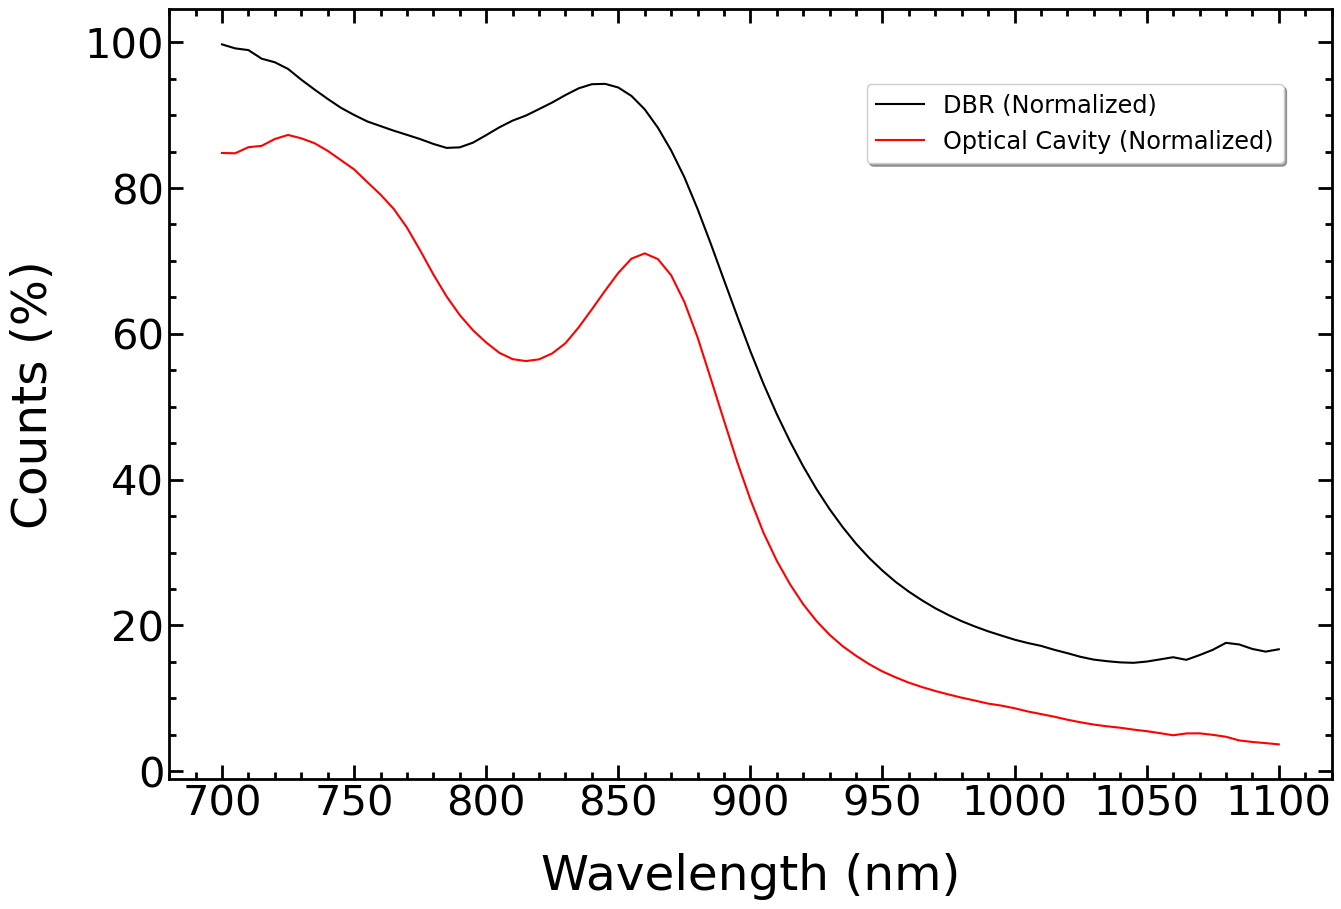

In [5]:
#Regular Plot

#Plotting the figure

fig, axx = plt.subplots()
fig.set_size_inches(15, 10)

dbr_two.plot(x="wavelength (nm)", y=["Normalized_Data"], ax=axx, color='black')
cavity.plot(x="wavelength (nm)", y=["Normalized_Data"], ax=axx, color='red')


#Plot settings
axx.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
axx.set_ylabel("Counts (%)", fontsize=35, labelpad=20)

labels = ['DBR (Normalized)', 'Optical Cavity (Normalized)']
axx.legend(labels=labels, fontsize='xx-large', loc=(0.6, 0.8), fancybox=True, shadow=True)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Customize tick parameters
axx.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
axx.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

axx.minorticks_on()
axx.xaxis.set_ticks_position('both')
axx.yaxis.set_ticks_position('both')

axx.tick_params(top="on", bottom="on", right="on", left="on")

axx.spines['bottom'].set_linewidth(2)
axx.spines['top'].set_linewidth(2)
axx.spines['right'].set_linewidth(2)
axx.spines['left'].set_linewidth(2)

#Saving the figure
plt.savefig('Cavity_Normalized_with_DBR_Normalized_Laboratory_Spectrum_SMALL.png', dpi=500, transparent=False, bbox_inches='tight')

plt.show()

In [6]:
import numpy as np

# Function to calculate the average slope within a specific x range
def calculate_slope_in_range(df, x_range):
    # Find the indices corresponding to the x range
    indices = np.where((df['wavelength (nm)'] >= min(x_range)) & (df['wavelength (nm)'] <= max(x_range)))[0]

    # Calculate the slope using the derivative of the function
    dy_dx = np.gradient(df["Normalized_Data"])

    # Calculate the average slope within the specified x range
    slope_in_range = np.mean(dy_dx[indices])

    return slope_in_range

# Function to plot the slope line within a specific x range
def plot_slope_line(ax, df, x_range, color='black'):
    slope_in_range = calculate_slope_in_range(df, x_range)
    x_values = np.array(x_range)
    intercept = df.iloc[(df['wavelength (nm)']-min(x_range)).abs().argsort()[:1]]["Normalized_Data"].values[0] - slope_in_range * min(x_range)
    y_values = slope_in_range * x_values + intercept
    ax.plot(x_values, y_values, '--', color=color, label=f'Slope in range {x_range[0]}-{x_range[-1]} nm')

# Example usage:
# plot_slope_line(ax, df, [500, 600], color='red')

In [7]:
# Function to perform linear fit within a specific x range
def linear_fit_in_range(df, x_range):
    # Filter the dataframe within the specified x range
    filtered_df = df[(df['wavelength (nm)'] >= min(x_range)) & (df['wavelength (nm)'] <= max(x_range))]
    
    # Perform linear fit
    coefficients = np.polyfit(filtered_df['wavelength (nm)'], filtered_df['Normalized_Data'], 1)
    
    return coefficients

def slope_from_linear_fit(coefficients):
    slope = coefficients[0]  # The first element of coefficients is the slope
    return slope

# Function to plot the linear fit within a specific x range
def plot_linear_fit(ax, df, x_range, color='black'):
    coefficients = linear_fit_in_range(df, x_range)
    slope = slope_from_linear_fit(coefficients)
    x_values = np.linspace(min(x_range), max(x_range), 100)
    y_values = np.polyval(coefficients, x_values)
    
    ax.plot(x_values, y_values, '--', linewidth=4, color=color)

    return coefficients, slope

# Example usage:
# plot_linear_fit(ax, df, [500, 600], color='blue')

[ -0.83853677 813.08418774]
[ -0.91704051 864.05136173]


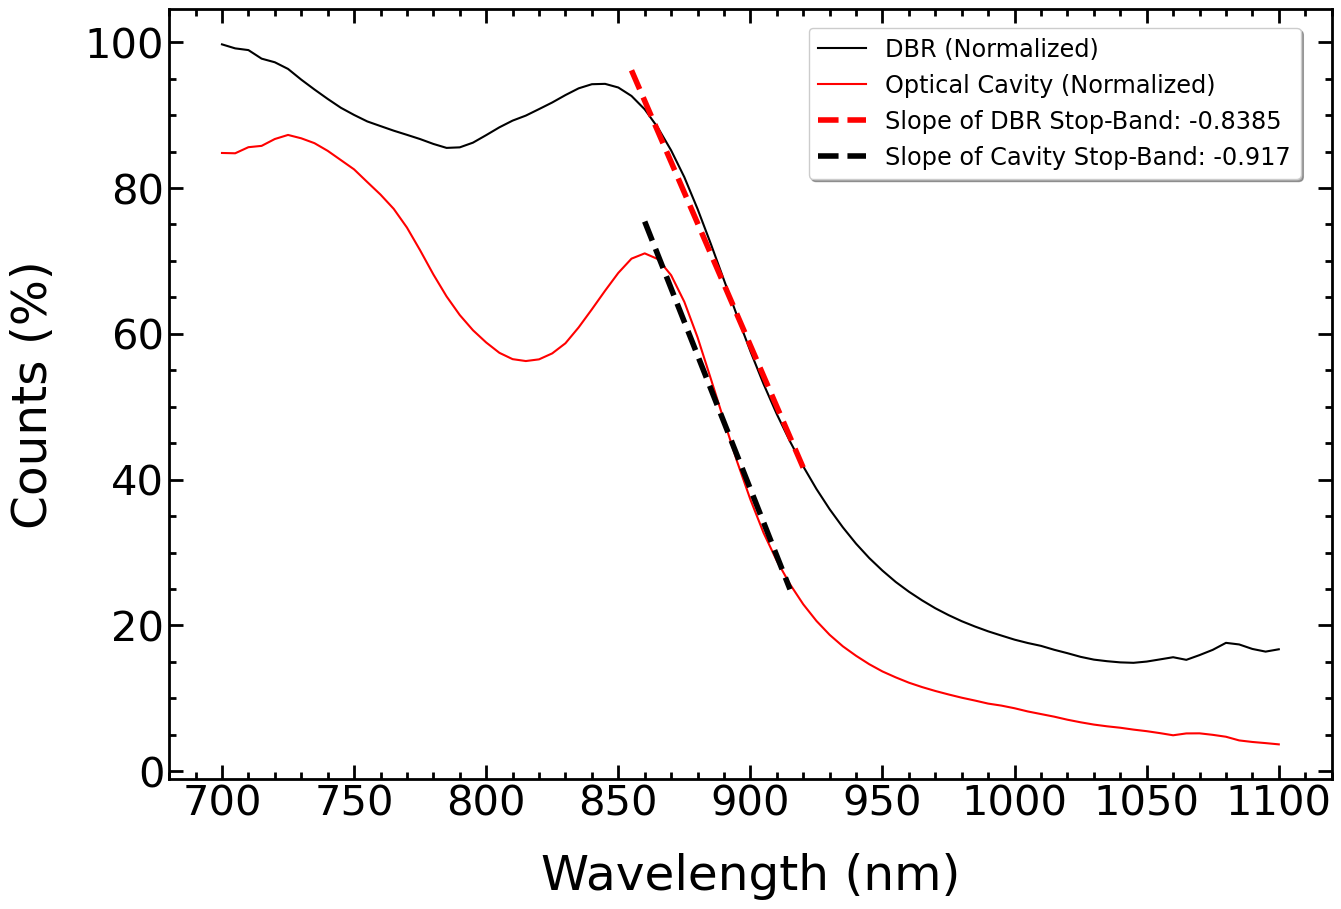

In [8]:
#Plotting the figure

fig, axx = plt.subplots()
fig.set_size_inches(15, 10)

dbr_two.plot(x="wavelength (nm)", y=["Normalized_Data"], ax=axx, color='black')
cavity.plot(x="wavelength (nm)", y=["Normalized_Data"], ax=axx, color='red')

#plot_slope_line(axx, dbr_two, [870, 885], color='black')
#plot_slope_line(axx, cavity, [870, 885], color='red')

coefficients_one, slope_one = plot_linear_fit(axx, dbr_two, [855, 920], color='red')
coefficients_two, slope_two = plot_linear_fit(axx, cavity, [860, 915], color='black')

print(coefficients_one)
print(coefficients_two)

#plot_linear_fit(axx, dbr_two, [870, 925], color='red')
#plot_linear_fit(axx, cavity, [880, 920], color='black')

#Plotting the dots at the tangent values
#axx.plot(860, dbr_two.at[30, "Normalized_Data"], 'o', color='black', markersize=10)
#axx.plot(860, cavity.at[30, "Normalized_Data"], 'o', color='red', markersize=10)
#axx.plot(940, dbr_two.at[50, "Normalized_Data"], 'o', color='black', markersize=10)
#axx.plot(940, cavity.at[50, "Normalized_Data"], 'o', color='red', markersize=10)


#Plot settings
axx.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
axx.set_ylabel("Counts (%)", fontsize=35, labelpad=20)

labels = ['DBR (Normalized)', 'Optical Cavity (Normalized)', f'Slope of DBR Stop-Band: {round(slope_one, 4)}', f'Slope of Cavity Stop-Band: {round(slope_two, 4)}']
          
axx.legend(labels=labels, fontsize='xx-large', loc=(0.55, 0.78), fancybox=True, shadow=True)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Customize tick parameters
axx.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
axx.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

axx.minorticks_on()
axx.xaxis.set_ticks_position('both')
axx.yaxis.set_ticks_position('both')

axx.tick_params(top="on", bottom="on", right="on", left="on")

axx.spines['bottom'].set_linewidth(2)
axx.spines['top'].set_linewidth(2)
axx.spines['right'].set_linewidth(2)
axx.spines['left'].set_linewidth(2)

#axx.set_ylim(0, 1)

#Saving the figure
plt.savefig('Cavity_Normalized_with_DBR_Normalized_Laboratory_Spectrum_with_Slopes_SMALL.png', dpi=500, transparent=False, bbox_inches='tight')

plt.show()

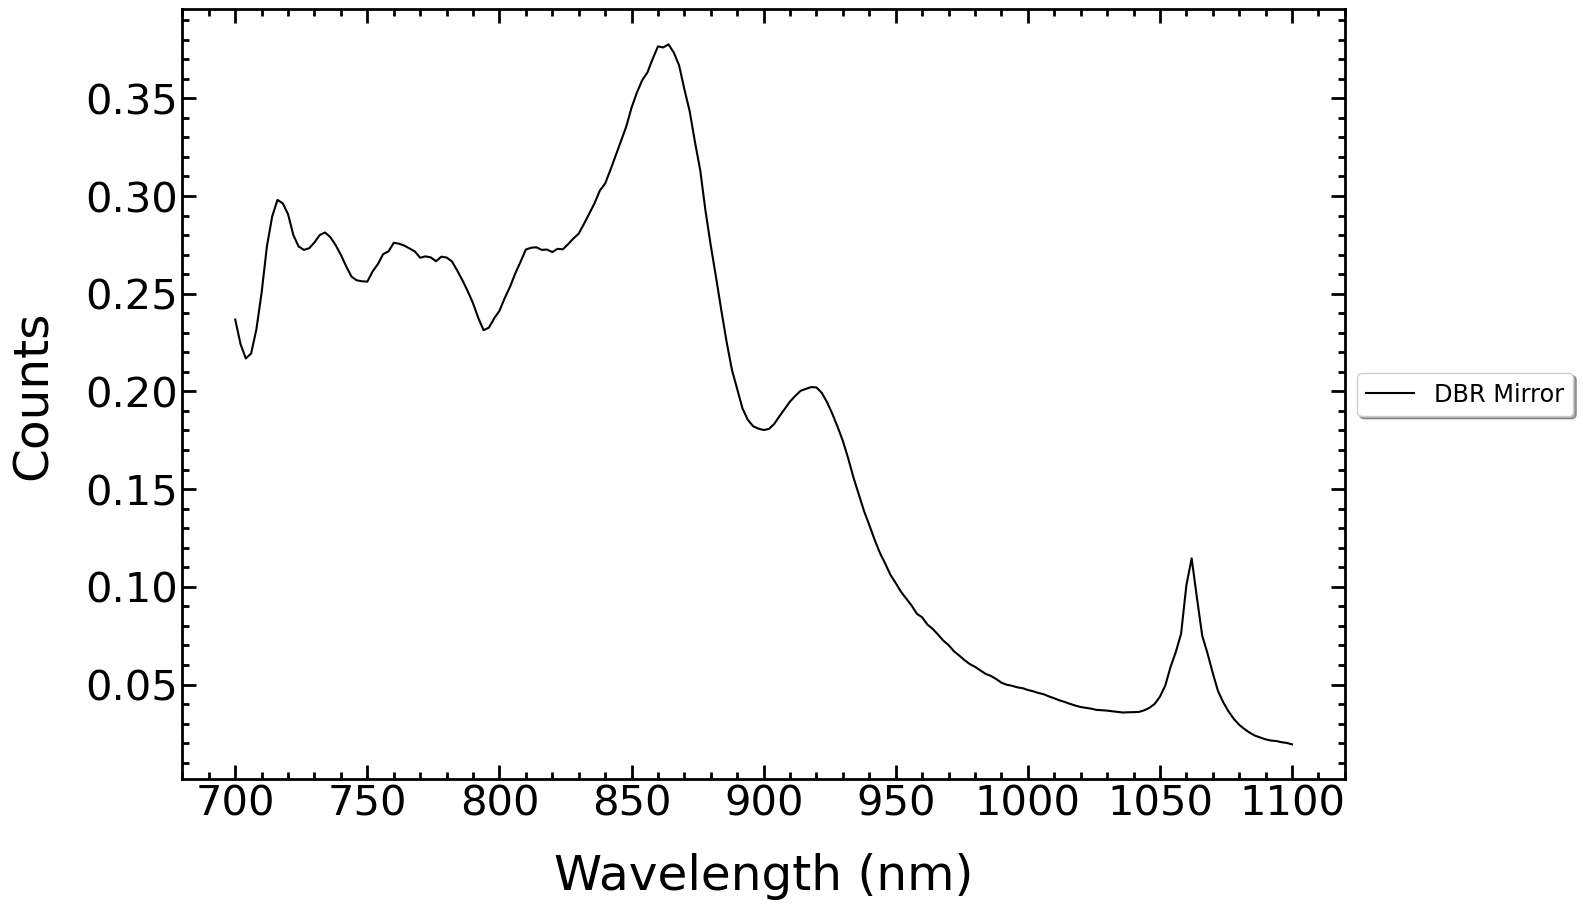

In [9]:
#For the DBR Measurement
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dbr.plot(x="wavelength (nm)",
                y=["lock-in 2 X (V)"], ax=ax)

# Set the color of the lines to black
for line in ax.get_lines():
    line.set_color('black')

ax.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
ax.set_ylabel("Counts", fontsize=35, labelpad=20)

labels = ['DBR Mirror']
ax.legend(labels=labels, fontsize='xx-large', loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Customize tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.tick_params(top="on", bottom="on", right="on", left="on")

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

#Saving the figure
plt.savefig('DBR_Laboratory_Spectrum.png', dpi=1000, transparent=False, bbox_inches='tight')

plt.show()

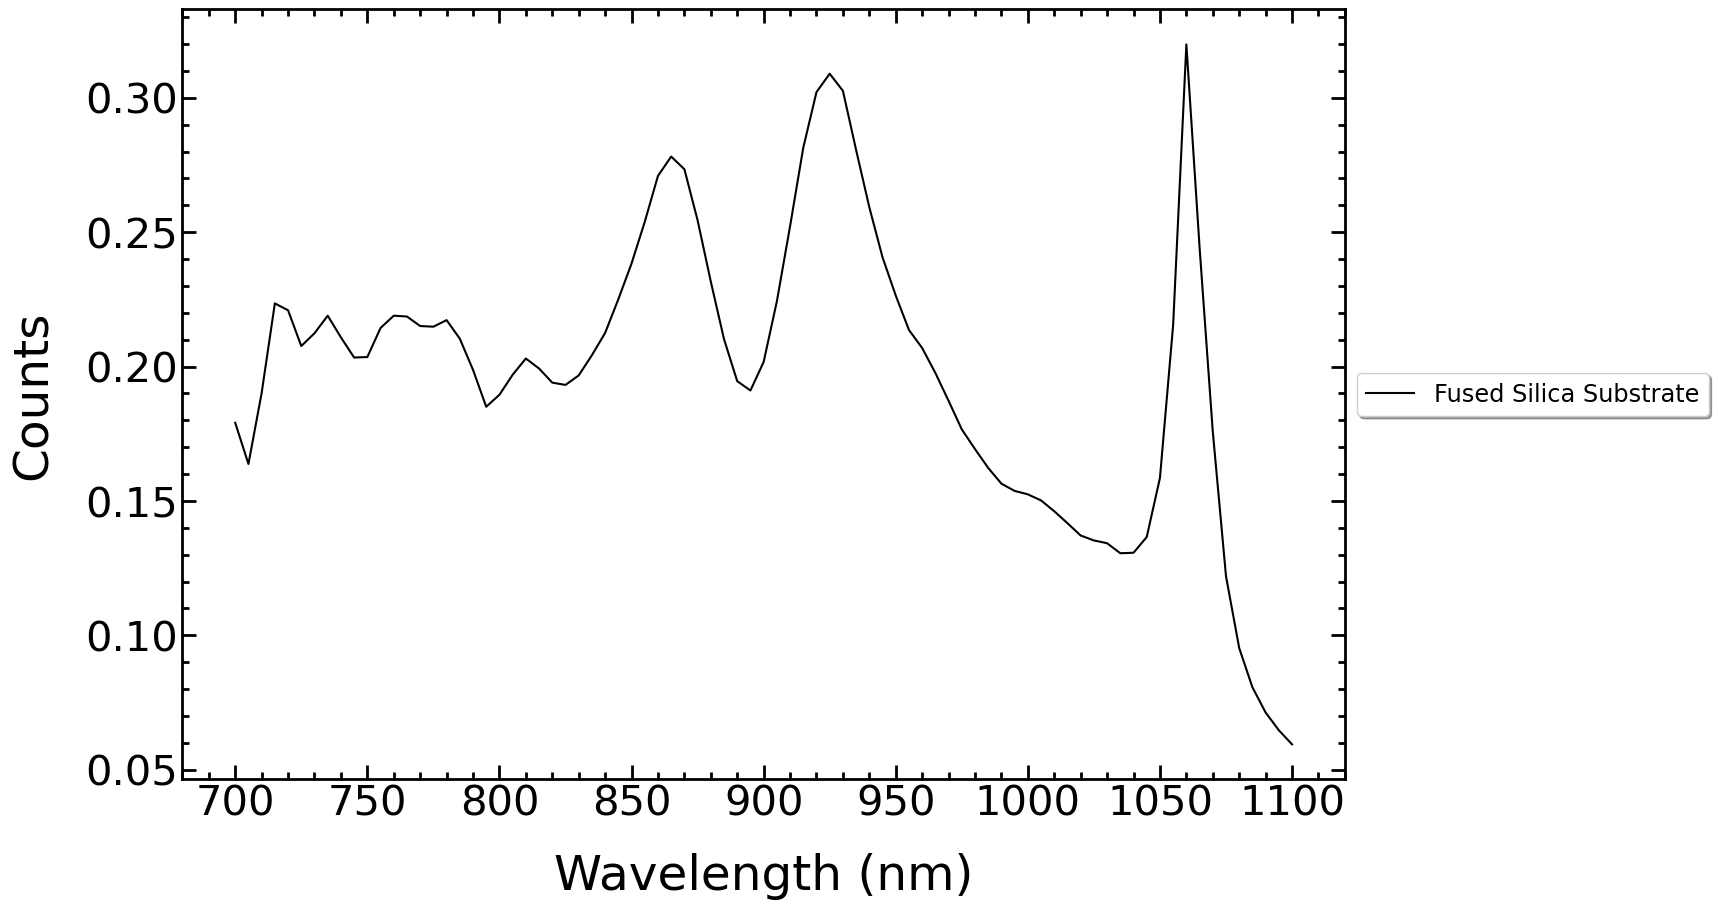

In [10]:
#For the glass measurement;
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

glass_plate.plot(x="wavelength (nm)",
                y=["lock-in 2 X (V)"], ax=ax)

# Set the color of the lines to black
for line in ax.get_lines():
    line.set_color('black')

ax.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
ax.set_ylabel("Counts", fontsize=35, labelpad=20)

labels = ['Fused Silica Substrate']
ax.legend(labels=labels, fontsize='xx-large', loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Customize tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.tick_params(top="on", bottom="on", right="on", left="on")

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

#Saving the figure
plt.savefig('Glass_Substrate_Laboratory_Spectrum.png', dpi=1000, transparent=False, bbox_inches='tight')

plt.show()

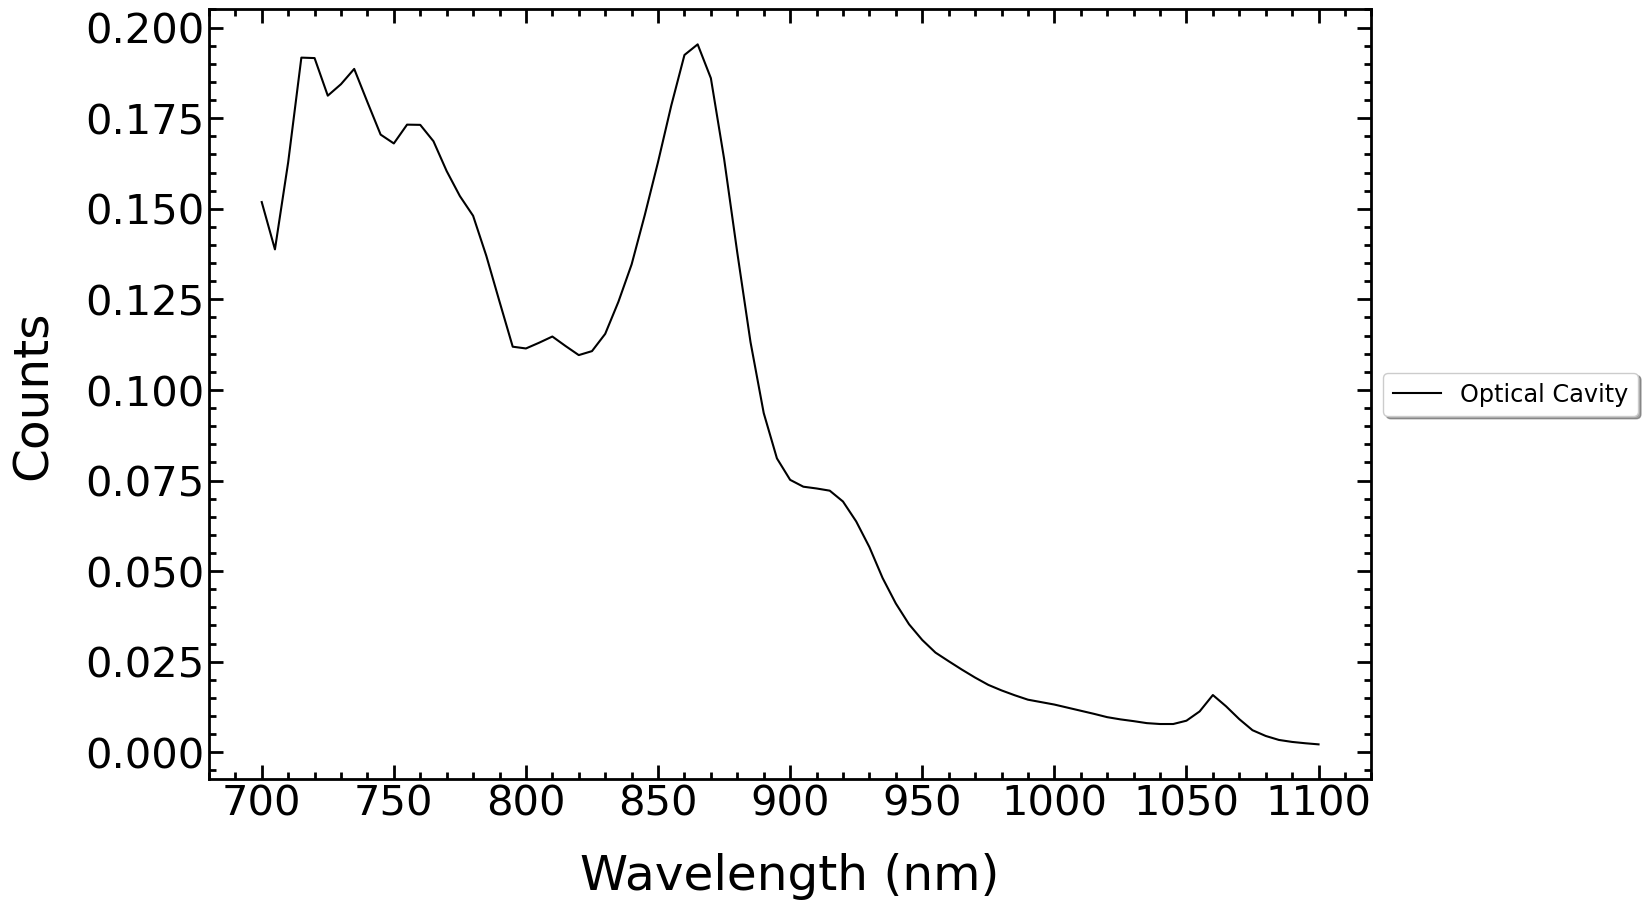

In [11]:
#For the cavity measurement
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cavity.plot(x="wavelength (nm)",
                y=["lock-in 2 X (V)"], ax=ax)

# Set the color of the lines to black
for line in ax.get_lines():
    line.set_color('black')

ax.set_xlabel("Wavelength (nm)", fontsize=35, labelpad=20)
ax.set_ylabel("Counts", fontsize=35, labelpad=20)

labels = ['Optical Cavity']
ax.legend(labels=labels, fontsize='xx-large', loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Customize tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               direction='in', # Tick direction (inside)
               length=10,         # Length of ticks
               width=2,           # Width of ticks
               colors='black')    

# Customize minor tick parameters
ax.tick_params(axis='both',       # Apply to both x and y axes
               which='minor',    # Minor ticks
               direction='in',   # Tick direction (inside)
               length=5,         # Length of minor ticks
               width=2,          # Width of minor ticks
               colors='black')   # Color of minor ticks

ax.minorticks_on()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.tick_params(top="on", bottom="on", right="on", left="on")

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

#Saving the figure
plt.savefig('Cavity_Laboratory_Spectrum.png', dpi=1000, transparent=False, bbox_inches='tight')

plt.show()